Example notebook showing how to use the nested sampler. Uses rejection flow, useful for low dimensions

In [1]:
import os
import sys
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *
from nnest.distributions import GeneralisedNormal

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
#like = Himmelblau(2)
#transform = lambda x: 5*x
like = Rosenbrock(2)
transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
base_dist = GeneralisedNormal(torch.zeros(like.x_dim), torch.ones(like.x_dim), torch.tensor(8.0))

In [7]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=1000, 
                        hidden_dim=16, num_blocks=3, flow='spline', base_dist=base_dist)

Creating directory for new run logs/test/run11
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [8]:
sampler.run(strategy=['rejection_prior', 'rejection_flow', 'mcmc'])

[nnest.sampler] [INFO] MCMC steps [10]
[nnest.sampler] [INFO] Initial scale [1.4142]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-8.2569e+04] max logl [-3.6097e-01] logz [-8.2576e+04] vol [1.00000e+00] ncalls [1001] mean calls [0.0000]
[nnest.sampler] [INFO] Step [200] loglstar [-2.9809e+04] max logl [-3.6097e-01] logz [-2.9816e+04] vol [8.18731e-01] ncalls [1223] mean calls [1.3500]
[nnest.sampler] [INFO] Step [400] loglstar [-1.3940e+04] max logl [-3.6097e-01] logz [-1.3947e+04] vol [6.70320e-01] ncalls [1478] mean calls [1.3000]
[nnest.sampler] [INFO] Step [600] loglstar [-6.7653e+03] max logl [-9.3045e-02] logz [-6.7728e+03] vol [5.48812e-01] ncalls [1808] mean calls [1.4000]
[nnest.sampler] [INFO] Step [800] loglstar [-3.2580e+03] max logl [-9.3045e-02] logz [-3.2657e+03] vol [4.49329e-01] ncalls [2190] mean calls [2.1000]
[nnest.sampler] [INFO] Step [1000] loglstar [-1.8662e+03] max logl [-9.3045e-02] logz [-1.8735e+03] vol [3.67879e-0

In [9]:
print(sampler.logz)

-5.867090191364373


In [10]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=-sampler.loglikes)

Removed no burn in


In [11]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)

3455.387510631882
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      9.3945344E-01  6.5513032E-01  3.4713113E-01  1.6751418E+00  two   -3.5066930E-01  2.1395694E+00  two   -7.8411157E-01  2.3889272E+00  two     p_{1}
param2      1.3123110E+00  1.2219352E+00 -9.1744033E-02  1.7562274E+00  two   -1.6722416E-01  3.8504596E+00  two   -1.9450129E-01  4.8831452E+00  two     p_{2}

Best fit sample -log(Like) = 0.001449
mean(-Ln(like)) = 0.956748
-Ln(mean like)  = 0.684308

parameter   bestfit        lower1         upper1         lower2         upper2
param1      9.9513650E-01 -3.9377133E-02  2.0567409E+00 -6.1507430E-01  2.2487868E+00   p_{1}
param2      9.9407144E-01 -4.2078844E-02  4.2281069E+00 -1.3261048E-01  4.9666855E+00   p_{2}



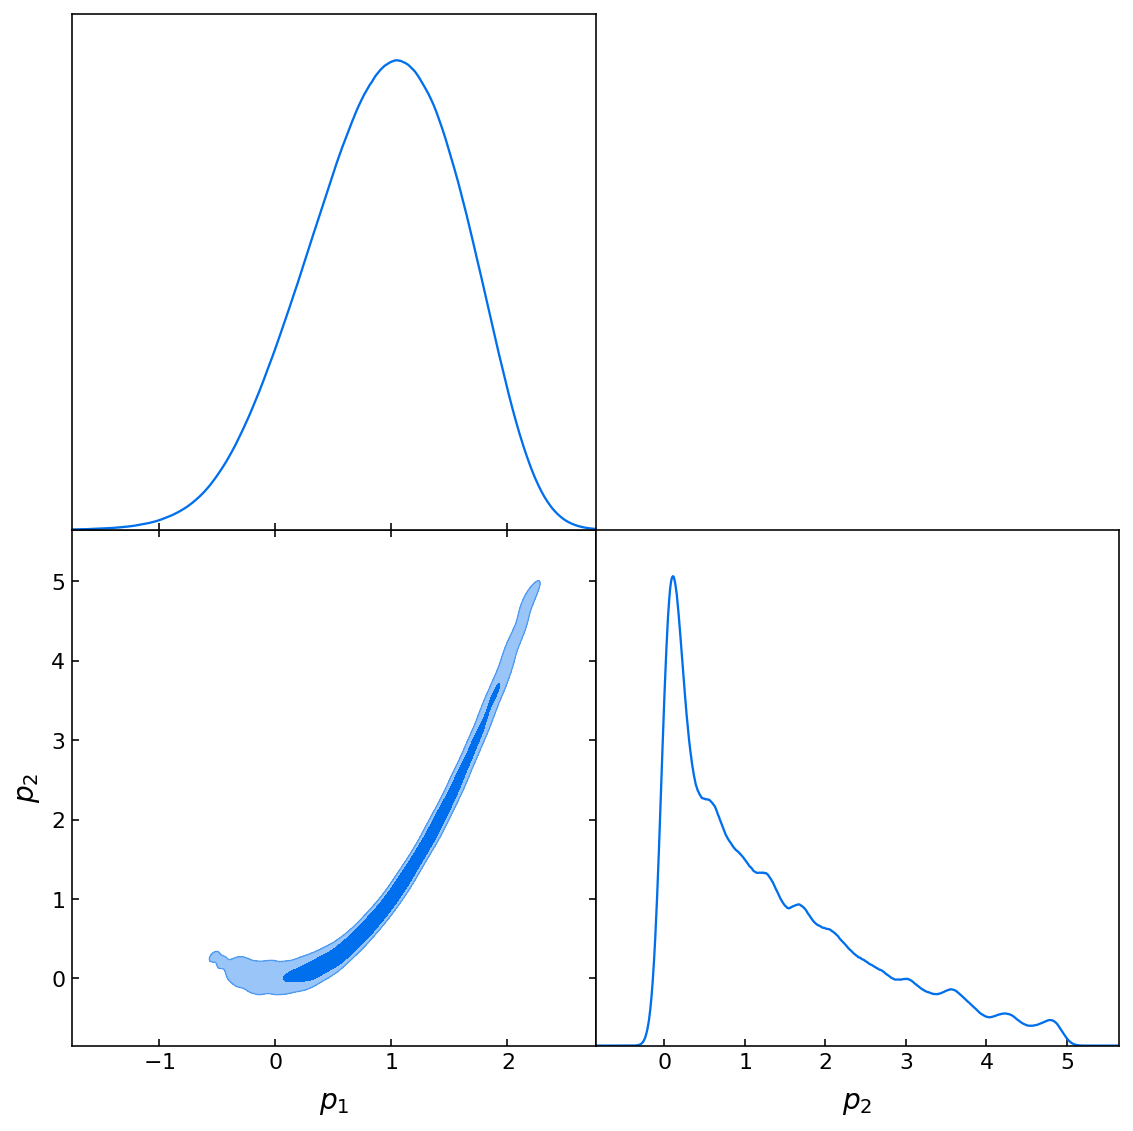

In [12]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)